In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

1. Подготовить свой портрет в цифровом формате (цветное изображение с разрешением не более 800×800 пикселей, формата .jpg или .png).
2. Произвести чтение исходного изображения.
3. Отобразить исходное изображение на экране.

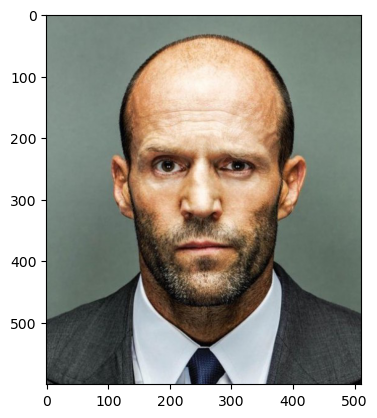

In [ ]:
%matplotlib inline
img = cv2.imread("/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/pic_lab_1.jpg"
                 , cv2.IMREAD_COLOR)[...,::-1]
plt.imshow(img)

4. Сохранить изображение в директории «.../DIP/Lab1» в формате jpg.
5. Сохранить изображение в директории «.../DIP/Lab1» в формате png.
6. Получить информацию о сохраненных файлах изображениях.

In [ ]:
jpg_path = '/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/jpg.jpg'
png_path = '/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/png.png'
jpg = cv2.imread(jpg_path)[...,::-1]
png = cv2.imread(png_path)[...,::-1]
cv2.imwrite(jpg_path, img[...,::-1])
cv2.imwrite(png_path, img[...,::-1])

print("Size of jpg in bytes is", os.path.getsize(jpg_path))
print("Size of png in bytes is", os.path.getsize(png_path))

Size of jpg in bytes is 79652
Size of png in bytes is 446142


In [ ]:
print("Size of jpg original in bytes is", os.path.getsize
      ("/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/pic_lab_1.jpg"))

Size of jpg original in bytes is 53465


In [ ]:
print('img.shape:', img.shape)
print('img.dtype:', img.dtype, '\n')
print('jpg.shape:', jpg.shape)
print('jpg.dtype:', jpg.dtype, '\n')
print('png.shape:', png.shape)
print('png.dtype:', png.dtype)

img.shape: (600, 511, 3)
img.dtype: uint8 

jpg.shape: (600, 511, 3)
jpg.dtype: uint8 

png.shape: (600, 511, 3)
png.dtype: uint8


7. Рассчитать и сравнить степень сжатия изображений в форматах jpg и png по формуле:

In [ ]:
K_jpg = 600*511*8/8/os.path.getsize(jpg_path)
K_png = 600*511*8/8/os.path.getsize(png_path)
print("K_jpg =", K_jpg)
print("K_png =", K_png)

K_jpg = 3.8492442123236077
K_png = 0.6872251435641566


In [ ]:
# Y' = 0.2989 R + 0.5870 G + 0.1140 B
b, g, r = cv2.split(img)
k = np.zeros_like(b)
b = cv2.merge([k, k, b])
g = cv2.merge([k, g, k])
r = cv2.merge([r, k, k])

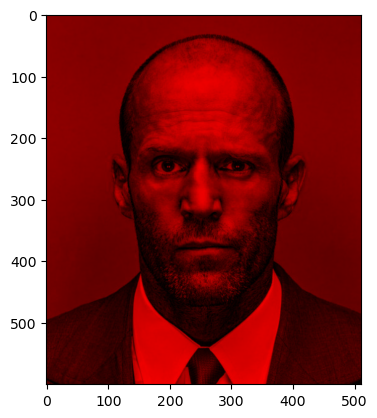

In [ ]:
plt.imshow(r)

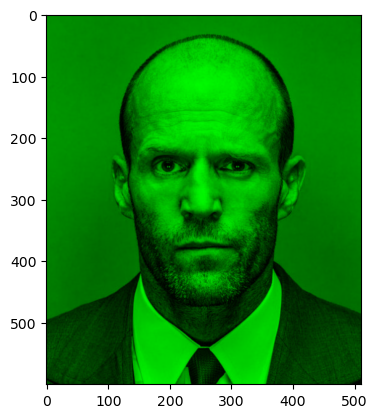

In [ ]:
plt.imshow(g)

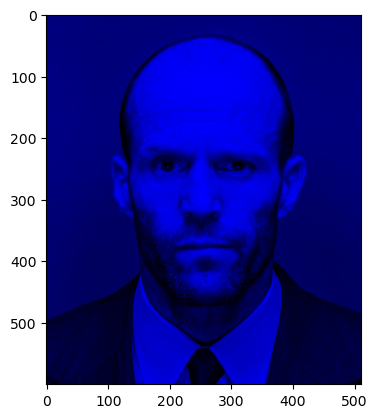

In [ ]:
plt.imshow(b)

8. Преобразовать исходное изображение в полутоновое и вывести на экран. Сохранить изображение в директории «.../DIP/Lab1».

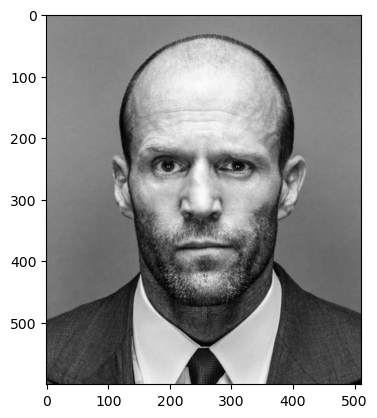

In [ ]:
# Y' = 0.2989 R + 0.5870 G + 0.1140 B
def rgb2gray(rgb):
    return np.round(rgb[:,:,0]*0.2989 + rgb[:,:,1]*0.5870 + rgb[:,:,2]*0.1140,0)
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(600, 511)

In [ ]:
gray_path = '/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/gray.jpg'
cv2.imwrite(gray_path, gray)

True

In [ ]:
gray = np.uint8(gray)
print(gray)

[[135 136 136 ... 127 127 128]
 [135 135 135 ... 127 127 127]
 [135 135 135 ... 127 127 127]
 ...
 [ 90  82  76 ...   3   0   7]
 [ 70  74  80 ...   5   3  12]
 [ 65  67  70 ...  12  16  22]]


9. Преобразовать полутоновое изображение в двоичное с порогом 25, 50, 75% и вывести на экран. Сохранить изображения в директории «.../DIP/Lab1/Logical».

In [ ]:
def convert_binary(image_matrix, thresh_val):
    white = 255
    black = 0

    initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)

    return final_conv


bm25 = convert_binary(gray, 256*0.25)
bm50 = convert_binary(gray, 256*0.5)
bm75 = convert_binary(gray, 256*0.75)

Text(0.5, 1.0, '75%')

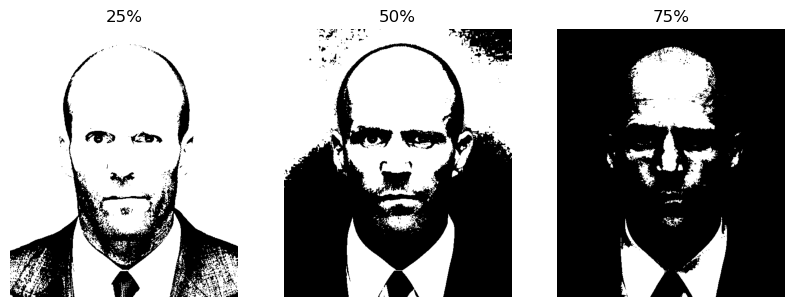

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)

# showing image
plt.imshow(bm25, cmap="gray")
plt.axis('off')
plt.title("25%")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)

# showing image
plt.imshow(bm50, cmap="gray")
plt.axis('off')
plt.title("50%")

# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)

# showing image
plt.imshow(bm75, cmap="gray")
plt.axis('off')
plt.title("75%")


In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Logical/bm25.bmp', bm25)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Logical/bm50.bmp', bm50)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Logical/bm75.bmp', bm75)

True

10. Преобразовать полутоновое изображение в 8-битовое, разбить на битовые плоскости. Результат преобразовать в двоичное изображение и вывести на экран каждую битовую плоскость. Сохранить каждую отдельную битовую плоскость в директорию «.../DIP/Lab1/BitPlane».

In [ ]:
# def convert_bit_plane(image_matrix):
#     values = [np.full_like(image_matrix, i) for i in range(8)]
#     thresh_values = [31+(i-1)*32 for i in range(1,8)]

# #     for k in range(7):
# #         final_conv = np.where((32*k <= image_matrix <= thresh_values[k]), values[k], image_matrix)
#     final_conv = np.where((0 <= image_matrix <= 31), values[0], image_matrix)
#     final_conv = np.where((32 <= image_matrix <= 63), values[1], image_matrix)
#     final_conv = np.where((64 <= image_matrix <= 95), values[2], image_matrix)
#     final_conv = np.where((96 <= image_matrix <= 127), values[3], image_matrix)
#     final_conv = np.where((128 <= image_matrix <= 159), values[4], image_matrix)
#     final_conv = np.where((160 <= image_matrix <= 191), values[5], image_matrix)
#     final_conv = np.where((192 <= image_matrix <= 227), values[6], image_matrix)
#     final_conv = np.where((228 <= image_matrix <= 255), values[7], image_matrix)

# #     final_conv = np.where((thresh_values[-1]+1 <= image_matrix <= 255), values[-1], image_matrix)


#     return final_conv
# # numpy.where(condition[, x, y])

In [ ]:
def get_binary_plane(input_img):

    out = []
    for i in range(input_img.shape[0]):
        for j in range(input_img.shape[1]):
            a = input_img[i][j]
            out.append(f"{np.binary_repr(a, width=8)}")

    resize_to = input_img.shape

    planes = []

    curr_i = 1
    for i in range(8):
        bit_img = (np.array([int(j[7 - i]) for j in out], dtype=np.uint8) * curr_i).reshape(resize_to)
        curr_i *= 2
        planes.append(bit_img)

    return planes

In [ ]:
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
         lst.append(np.binary_repr(gray[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate
# over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(gray.shape[0],gray.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(gray.shape[0],gray.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(gray.shape[0],gray.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(gray.shape[0],gray.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(gray.shape[0],gray.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(gray.shape[0],gray.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(gray.shape[0],gray.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(gray.shape[0],gray.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr,finalv])

Text(0.5, 1.0, 'Eigth (LSB)')

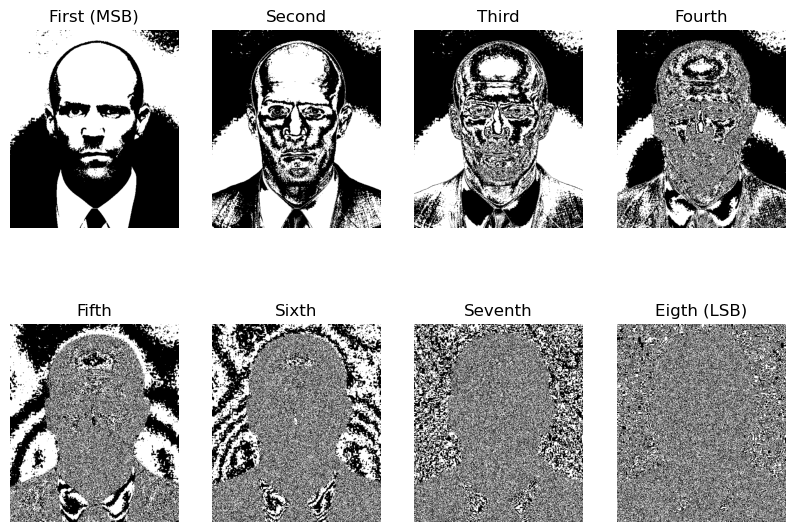

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 4

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(eight_bit_img, cmap="gray")
plt.axis('off')
plt.title("First (MSB)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(seven_bit_img, cmap="gray")
plt.axis('off')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(six_bit_img, cmap="gray")
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(five_bit_img, cmap="gray")
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(four_bit_img, cmap="gray")
plt.axis('off')
plt.title("Fifth")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(three_bit_img, cmap="gray")
plt.axis('off')
plt.title("Sixth")

# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 7)

# showing image
plt.imshow(two_bit_img, cmap="gray")
plt.axis('off')
plt.title("Seventh")

# Adds a subplot at the 8th position
fig.add_subplot(rows, columns, 8)

# showing image
plt.imshow(one_bit_img, cmap="gray")
plt.axis('off')
plt.title("Eigth (LSB)")

11. Выполнить дискретизацию полутонового изображения с ядром 5×5, 10×10, 20×20, 50×50. Дискретизация реализуется функцией blkproc(I, [m n],'mean2(x)*ones(size(x))'); Сохранить изображения в директории «.../DIP/Lab1/Discret».

In [ ]:
gray.shape

(600, 511)

In [ ]:
# gray = np.insert(gray, gray.shape[0], 0, axis=0) # добавление строки нулей снизу
# gray = np.insert(gray, gray.shape[1], 0, axis=1) # добавление столбца нулей справа

cell_1 = [5, 5]
cell_2 = [10, 10]
cell_3 = [20, 20]
cell_4 = [50, 50]

def discr(gray_image, cell_np_array):
    height = gray_image.shape[0]
    width = gray_image.shape[1]
    cell_height = cell_np_array[0]
    cell_width = cell_np_array[1]
    if height % cell_height != 0:
        height_dif = (height // cell_height) * cell_height + cell_height - height
        for i in range(height_dif):
            gray_image = np.insert(gray_image, gray_image.shape[0], 0, axis=0) # добавление строки нулей снизу
    if width % cell_width != 0:
        width_dif = (width // cell_width) * cell_width + cell_width - width
        for i in range(width_dif):
            gray_image = np.insert(gray_image, gray_image.shape[1], 0, axis=1) # добавление столбца нулей справа
    return gray_image

def mean_after_discr(gray_image, cell_np_array):
    kol = []
    for i in range(gray_image.shape[0]//cell_np_array[0]):
        for j in range(gray_image.shape[1]//cell_np_array[1]):
            kol.append(int(round(gray_image[i*cell_np_array[0]:(i+1)*cell_np_array[0],
                                            j*cell_np_array[1]:(j+1)*cell_np_array[1]].mean(),0)))
    return (np.array(kol)).reshape(gray_image.shape[0]//cell_np_array[0], gray_image.shape[1]//cell_np_array[1])


# kol = []
# for i in range(x.shape[0]//5):
#     for j in range(x.shape[1]//5):
#         kol.append(int(round(x[i*5:(i+1)*5, j*5:(j+1)*5].mean(),0)))
# kol2 = (np.array(kol)).reshape(x.shape[0]//5, x.shape[1]//5)


# x2 = x[0:5,0:5]
# int(round(x2.mean(),0))
# gray_5_5 = discr(gray, cell_1)

Text(0.5, 1.0, 'Shape: (12, 11)')

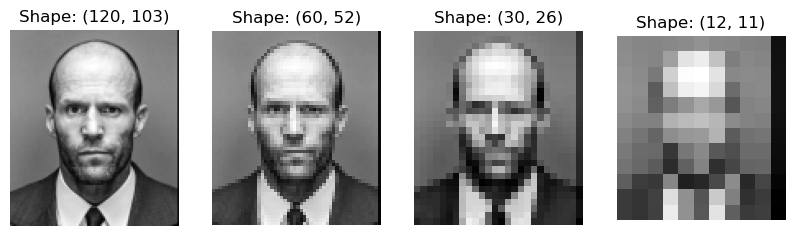

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

disc_1 = mean_after_discr((discr(gray, cell_1)), cell_1)
disc_2 = mean_after_discr((discr(gray, cell_2)), cell_2)
disc_3 = mean_after_discr((discr(gray, cell_3)), cell_3)
disc_4 = mean_after_discr((discr(gray, cell_4)), cell_4)

# Adds a subplot at the 1st position
fig.add_subplot(1, 4, 1)

# showing image
plt.imshow(disc_1, cmap="gray")
plt.axis('off')
plt.title("Shape: "+str(disc_1.shape))

# Adds a subplot at the 2nd position
fig.add_subplot(1, 4, 2)

# showing image
plt.imshow(disc_2, cmap="gray")
plt.axis('off')
plt.title("Shape: "+str(disc_2.shape))

# Adds a subplot at the 3rd position
fig.add_subplot(1, 4, 3)

# showing image
plt.imshow(disc_3, cmap="gray")
plt.axis('off')
plt.title("Shape: "+str(disc_3.shape))

# Adds a subplot at the 4th position
fig.add_subplot(1, 4, 4)

# showing image
plt.imshow(disc_4, cmap="gray")
plt.axis('off')
plt.title("Shape: "+str(disc_4.shape))

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Discret/disc_1.png', disc_1)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Discret/disc_2.png', disc_2)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Discret/disc_3.png', disc_3)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Discret/disc_4.png', disc_4)

True

12. Выполнить квантование полутонового изображения по уровню 4, 16, 32, 64, 128. Сохранить изображения в директории «.../DIP/Lab1/Quantiz».

In [ ]:
def quant(gray_image, level):
    lev = 256 // level

    vfunc = np.vectorize(lambda x: (x // lev) * lev)

    return np.array(vfunc(gray_image)).astype(np.uint8)

# level - это 2, 4, 8, 32 ... 128

Text(0.5, 1.0, 'Level is 128')

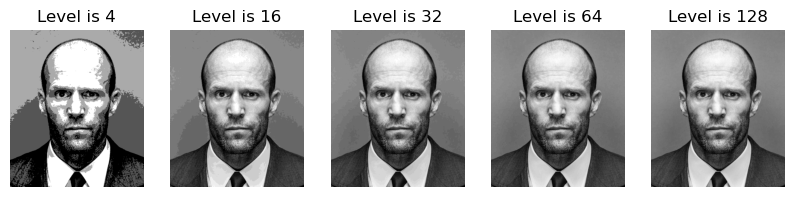

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

gray4 = quant(gray, 4)
gray16 = quant(gray, 16)
gray32 = quant(gray, 32)
gray64 = quant(gray, 64)
gray128 = quant(gray, 128)

# Adds a subplot at the 1st position
fig.add_subplot(1, 5, 1)

# showing image
plt.imshow(gray4, cmap="gray")
plt.axis('off')
plt.title("Level is 4")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 5, 2)

# showing image
plt.imshow(gray16, cmap="gray")
plt.axis('off')
plt.title("Level is 16")


# Adds a subplot at the 3rd position
fig.add_subplot(1, 5, 3)

# showing image
plt.imshow(gray32, cmap="gray")
plt.axis('off')
plt.title("Level is 32")


# Adds a subplot at the 4th position
fig.add_subplot(1, 5, 4)

# showing image
plt.imshow(gray64, cmap="gray")
plt.axis('off')
plt.title("Level is 64")


# Adds a subplot at the 5th position
fig.add_subplot(1, 5, 5)

# showing image
plt.imshow(gray128, cmap="gray")
plt.axis('off')
plt.title("Level is 128")


In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Quantiz/gray4.png', gray4)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Quantiz/gray16.png', gray16)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Quantiz/gray32.png', gray32)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Quantiz/gray64.png', gray64)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Quantiz/gray128.png', gray128)

True

13. Вырезать из центра полутонового изображения область размером 100×100 пикселей и вывести на экран. Сохранить изображение вырезанной области в директории «.../DIP/Lab1/Crop».

In [ ]:
def cut(gray_img, size):
    x = gray_img.shape[1]//2
    y = gray_img.shape[0]//2
    return gray_img[y-size[1]//2:y+size[1]//2, x-size[0]//2:x+size[0]//2]

In [ ]:
cut_gray = cut(gray, [100,100])
cut_gray.shape

(100, 100)

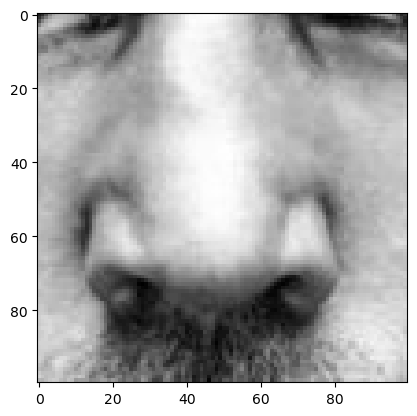

In [ ]:
plt.imshow(cut_gray, cmap="gray")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Crop/cut_gray.png', cut_gray)

True

14. Сохранить в массивы N1, N2, N3 значения четверки соседей пикселя p1(21,17), четверки соседей по диагонали пикселя p2(15, 11), восьмерки соседей пикселя p3(19, 88) соответственно.

In [ ]:
N1 = [gray[20,17], gray[21,16], gray[22,17], gray[21,18]]
N2 = [gray[14,10], gray[16,10], gray[16,12], gray[14,12]]
N3 = [gray[18,87], gray[19,87], gray[20,87], gray[18,88], gray[20,88], gray[18,89], gray[19,89], gray[20,89]]
print(f'N1: {N1}')
print(f'N2: {N2}')
print(f'N3: {N3}')

N1: [137, 136, 136, 136]
N2: [137, 138, 138, 138]
N3: [129, 129, 130, 128, 129, 129, 129, 129]


15. Посчитать средний уровень яркости на изображении.

In [ ]:
avg_y = img.mean()
print(f'Средний уровень яркости на изображении = {round(avg_y,2)}')

Средний уровень яркости на изображении = 122.43


16. Нанести на полутоновое изображение метки в форме квадрата размером 20×20 пикселей в центр и по углам изображения – если средний уровень яркости меньше 128 – белым цветом, если больше – черным. Вывести изображение на экран и сохранить в директории
«.../DIP/Lab1/Marks».

In [ ]:
def spot(image, size, bright):
    if bright < 128:
        c = 255
    else:
        c = 0
    x = image.shape[1]//2
    y = image.shape[0]//2
    new_img = np.copy(image)
    new_img[y-size[1]//2:y+size[1]//2, x-size[0]//2:x+size[0]//2] = c # spot in the center
    new_img[0:size[1], 0:size[0]] = c # up left
    new_img[-size[1]:, 0:size[0]] = c # down left
    new_img[0:size[1], -size[0]:] = c # up right
    new_img[-size[1]:, -size[0]:] = c # down right
    return new_img

In [ ]:
gray_with_marks = spot(gray, [20, 20], avg_y)
gray_with_marks.shape

(600, 511)

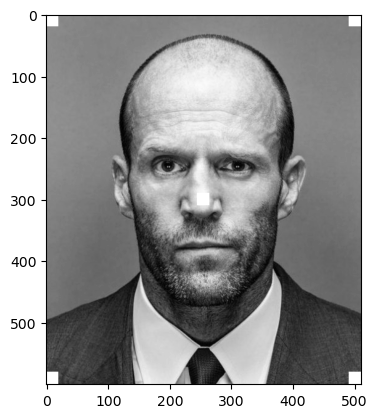

In [ ]:
plt.imshow(gray_with_marks, cmap="gray")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/Marks/gray_with_marks.png', gray_with_marks)

True